#### Problem Statement : Explore out the briefer analysis on Netflix Dataset with an access to noticeable feature attributes for Movies/TV Shows with Viewership Score and present the justifiable insights in points along with an overall summary.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv('data.csv')
data.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [12]:
data.shape

(7100, 10)

In [13]:
data.columns

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10',
       'Viewership Score'],
      dtype='object')

In [14]:
data.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [24]:
data['As of'] = pd.to_datetime(data['As of'])

In [25]:
data['Year to Date Rank'].unique()

array(['1', '2', '3', '4', '5', '6', '10', '7', '8', '9', 0], dtype=object)

In [26]:
data['Year to Date Rank'].replace('-', 0, inplace = True)

In [30]:
data['Year to Date Rank'] = data['Year to Date Rank'].astype(int)
data['Year to Date Rank'].dtype

dtype('int32')

In [32]:
data['Last Week Rank'].replace('-', 0, inplace = True)

In [34]:
data['Last Week Rank'] = pd.to_numeric(data['Last Week Rank'])
data['Last Week Rank'].dtype

dtype('int64')

In [ ]:
data.drop('Netflix Exclusive', axis = 1, inplace = True)

In [36]:
data['Netflix Release Date'] = pd.to_datetime(data['Netflix Release Date'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   int32         
 3   Last Week Rank        7100 non-null   int64         
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Release Date  7100 non-null   datetime64[ns]
 7   Days In Top 10        7100 non-null   int64         
 8   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int32(1), int64(4), object(2)
memory usage: 471.6+ KB


In [38]:
data.duplicated().sum()

0

In [39]:
data.isnull().sum()

As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

In [62]:
data.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,2020-03-20,9,90
1,2020-04-01,2,2,0,Ozark,TV Show,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,2019-03-28,9,76
3,2020-04-01,4,4,0,Blood Father,Movie,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,2020-03-20,9,55


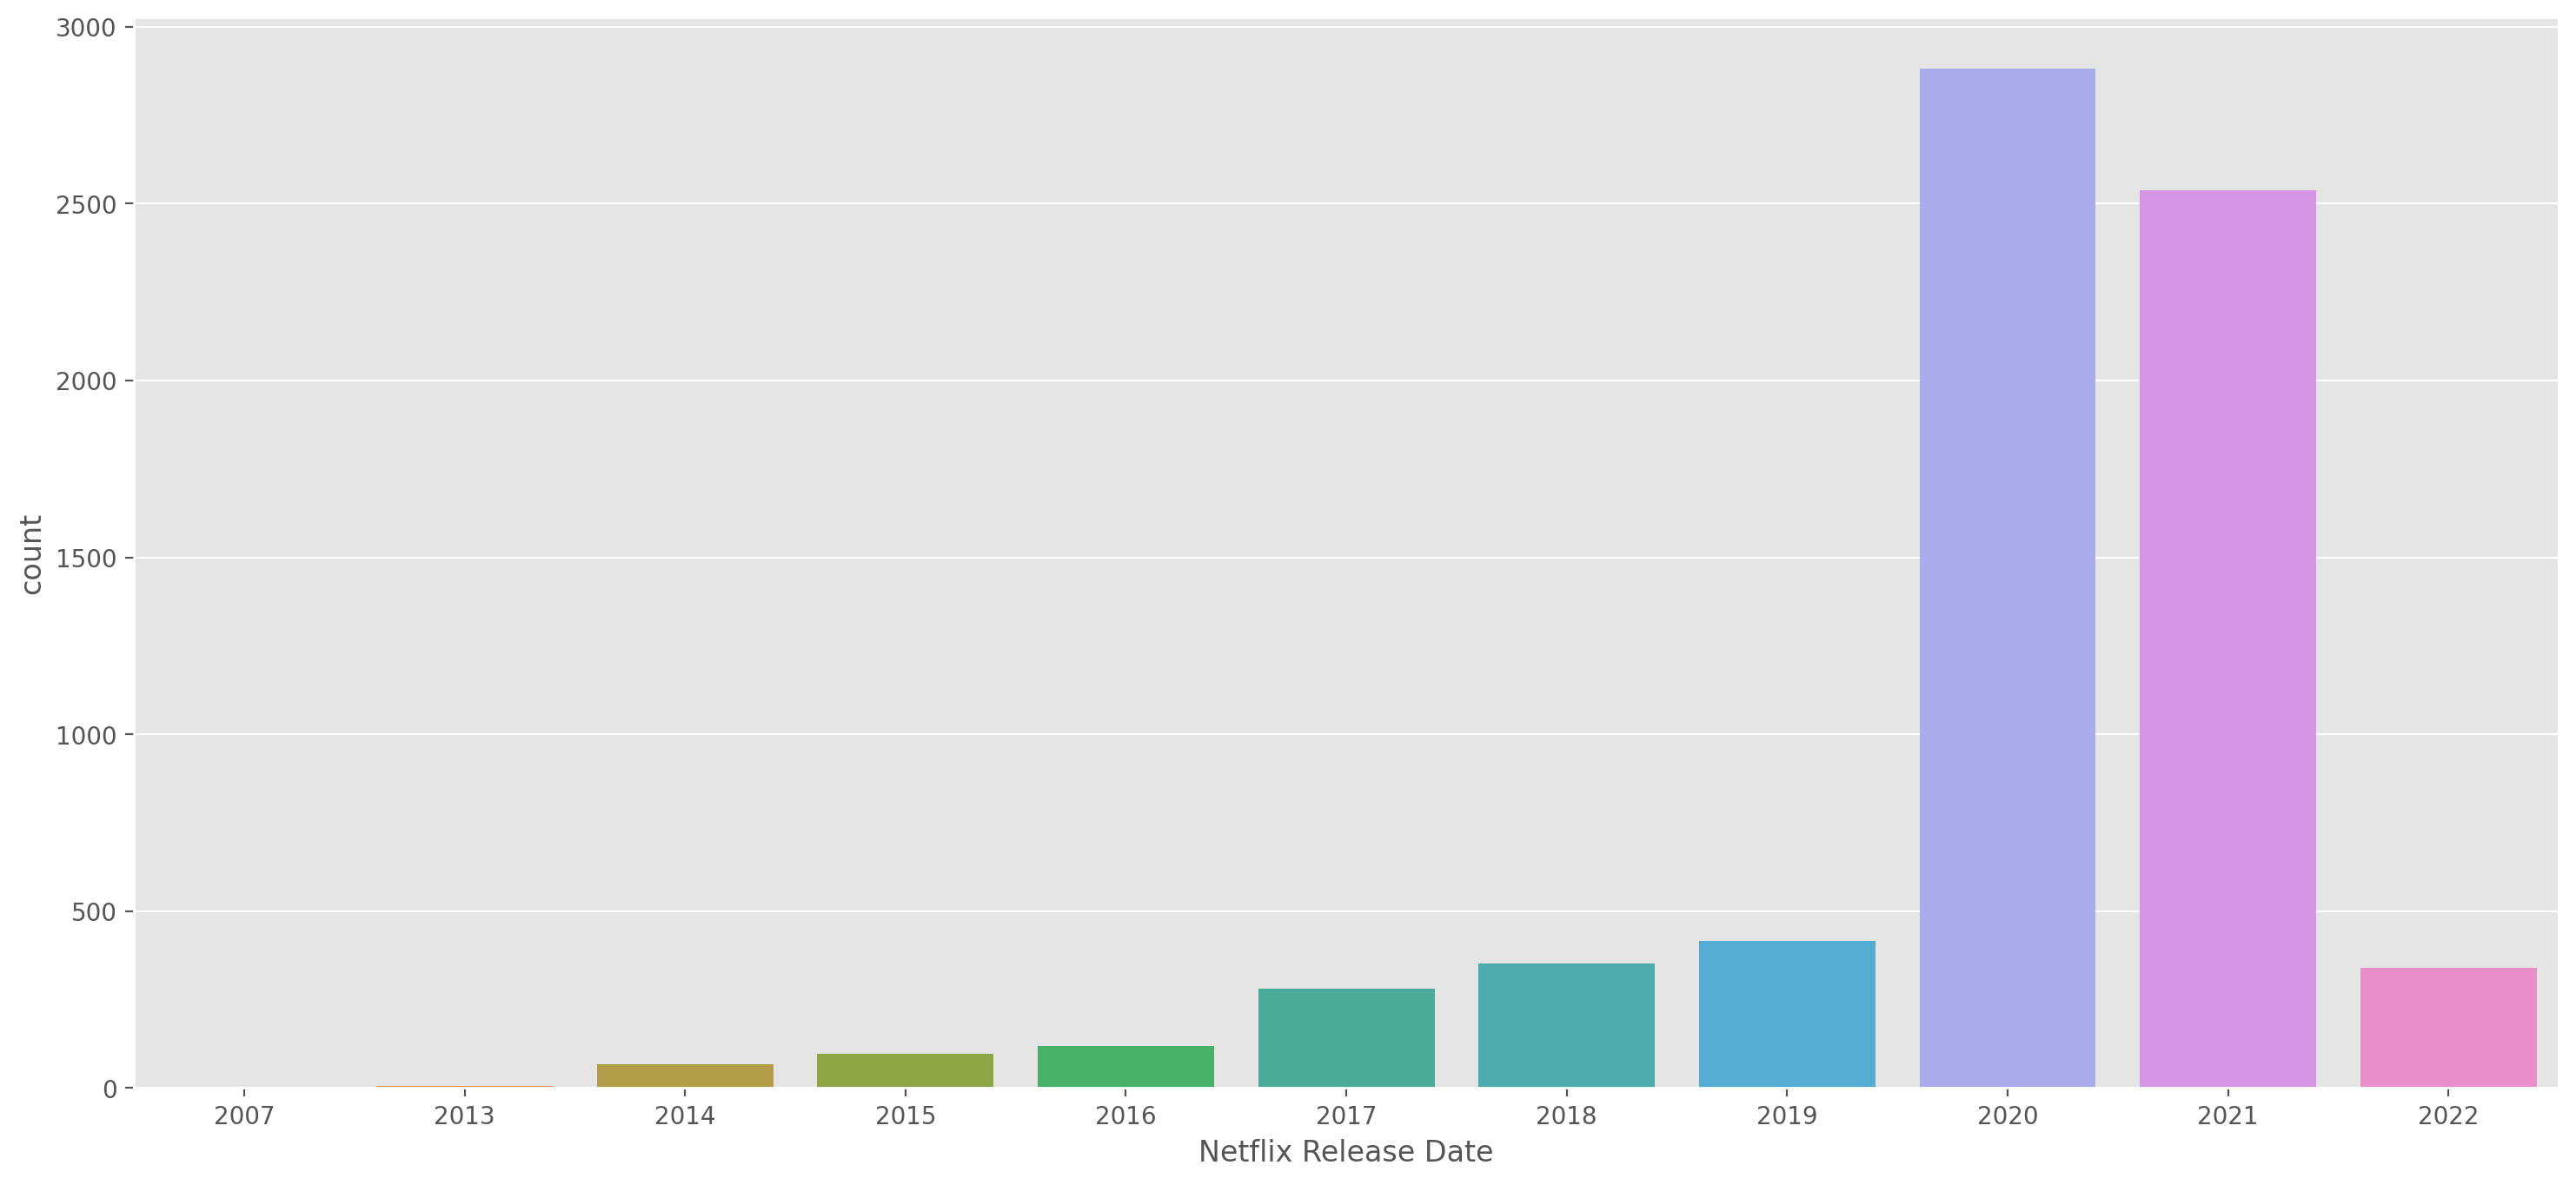

In [78]:
plt.figure(figsize = (18,8), dpi = 200)
sns.countplot(data['Netflix Release Date'].dt.year, data = data)
plt.show()

#### Count of netflix release was negligible in year 2007 and 2013 and gradually increased till year 2019.
#### A drastic increase in netflix release is noted in the year 2020 and 2021 where 2021 is the highest release holder.

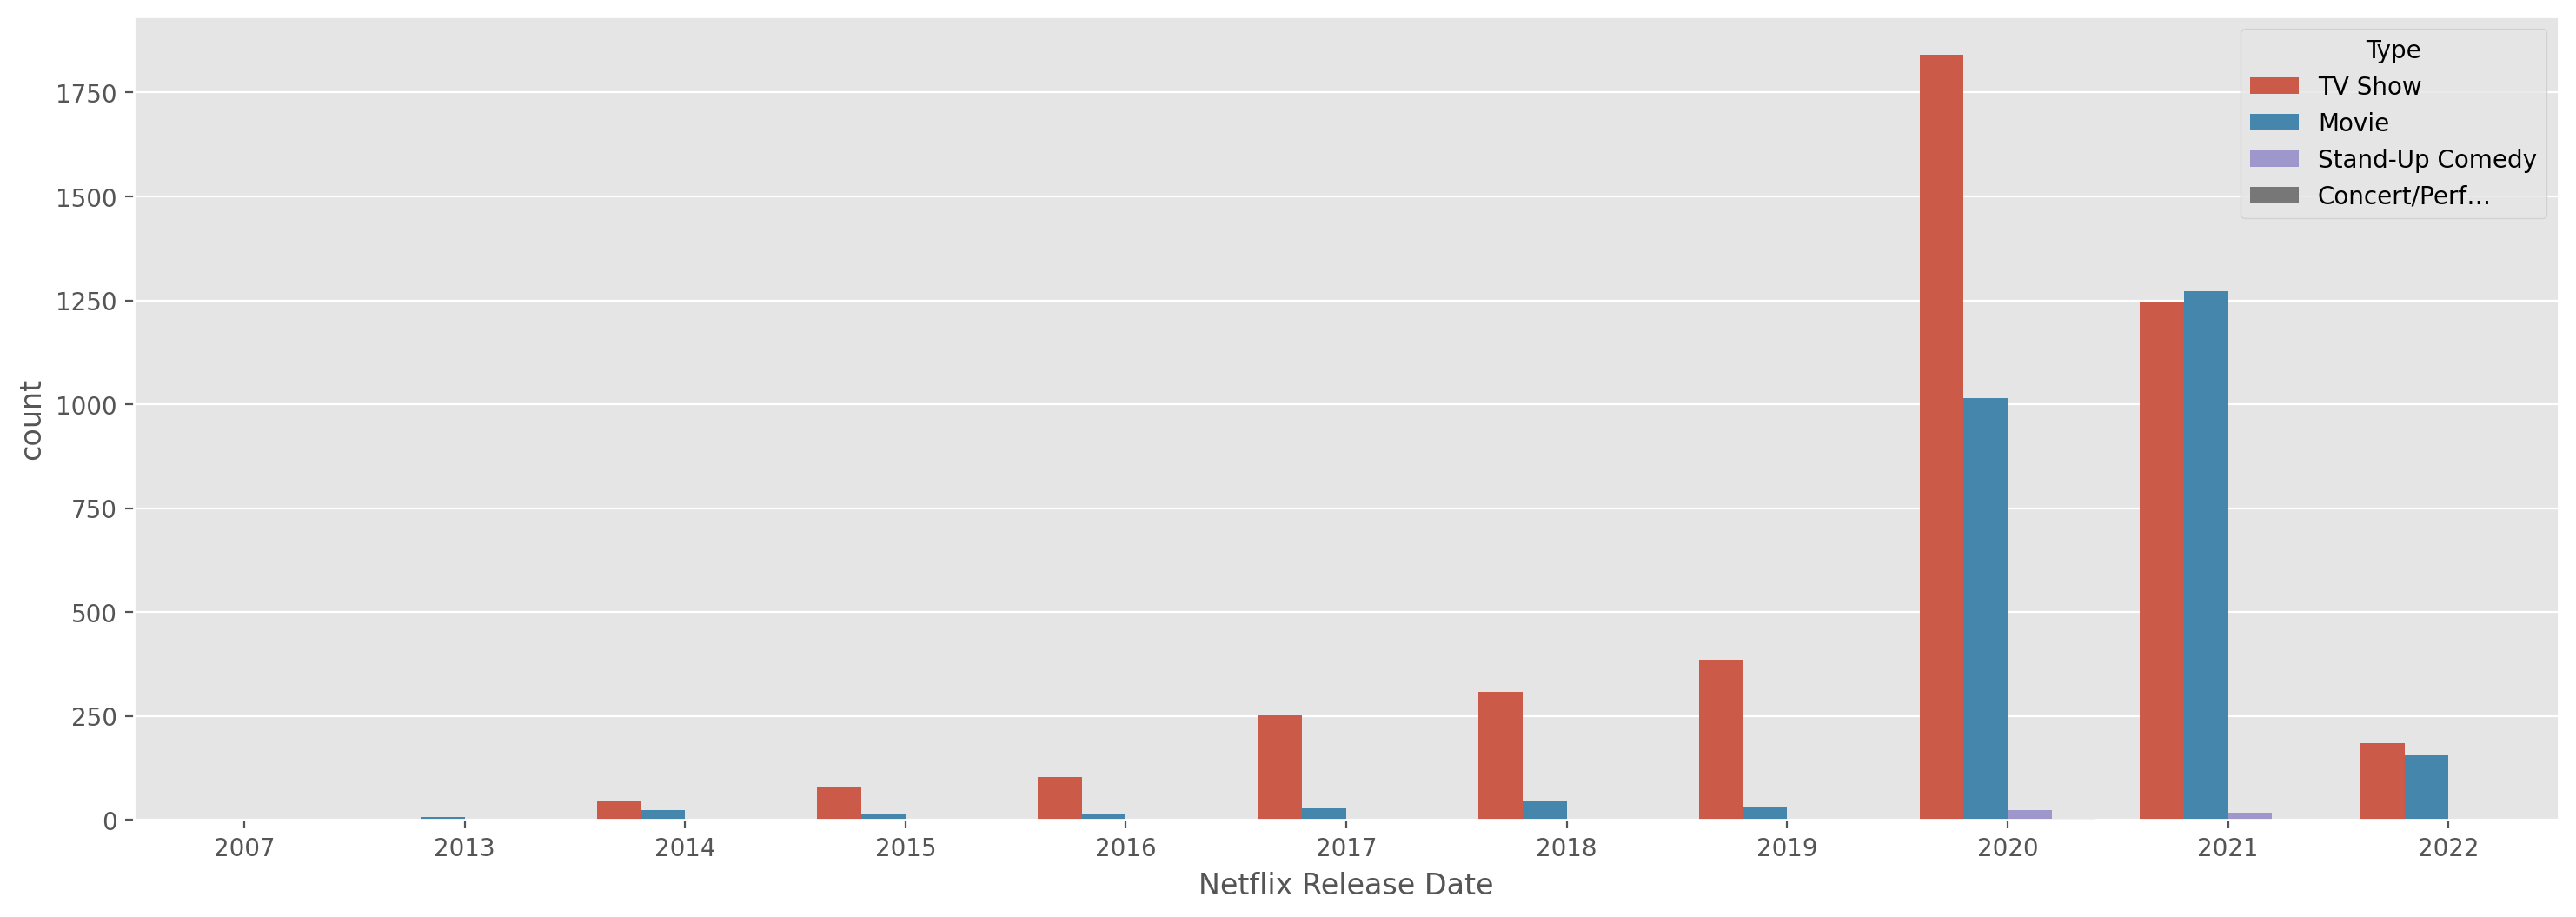

In [77]:
plt.figure(figsize = (18,6), dpi = 200)
sns.countplot(data['Netflix Release Date'].dt.year, hue= 'Type', data = data)
plt.show()

#### The content of movie type release was very low till year 2019 as compared to TV shows, but it took pace in year 2020 and overtook tv shows in year 2021 

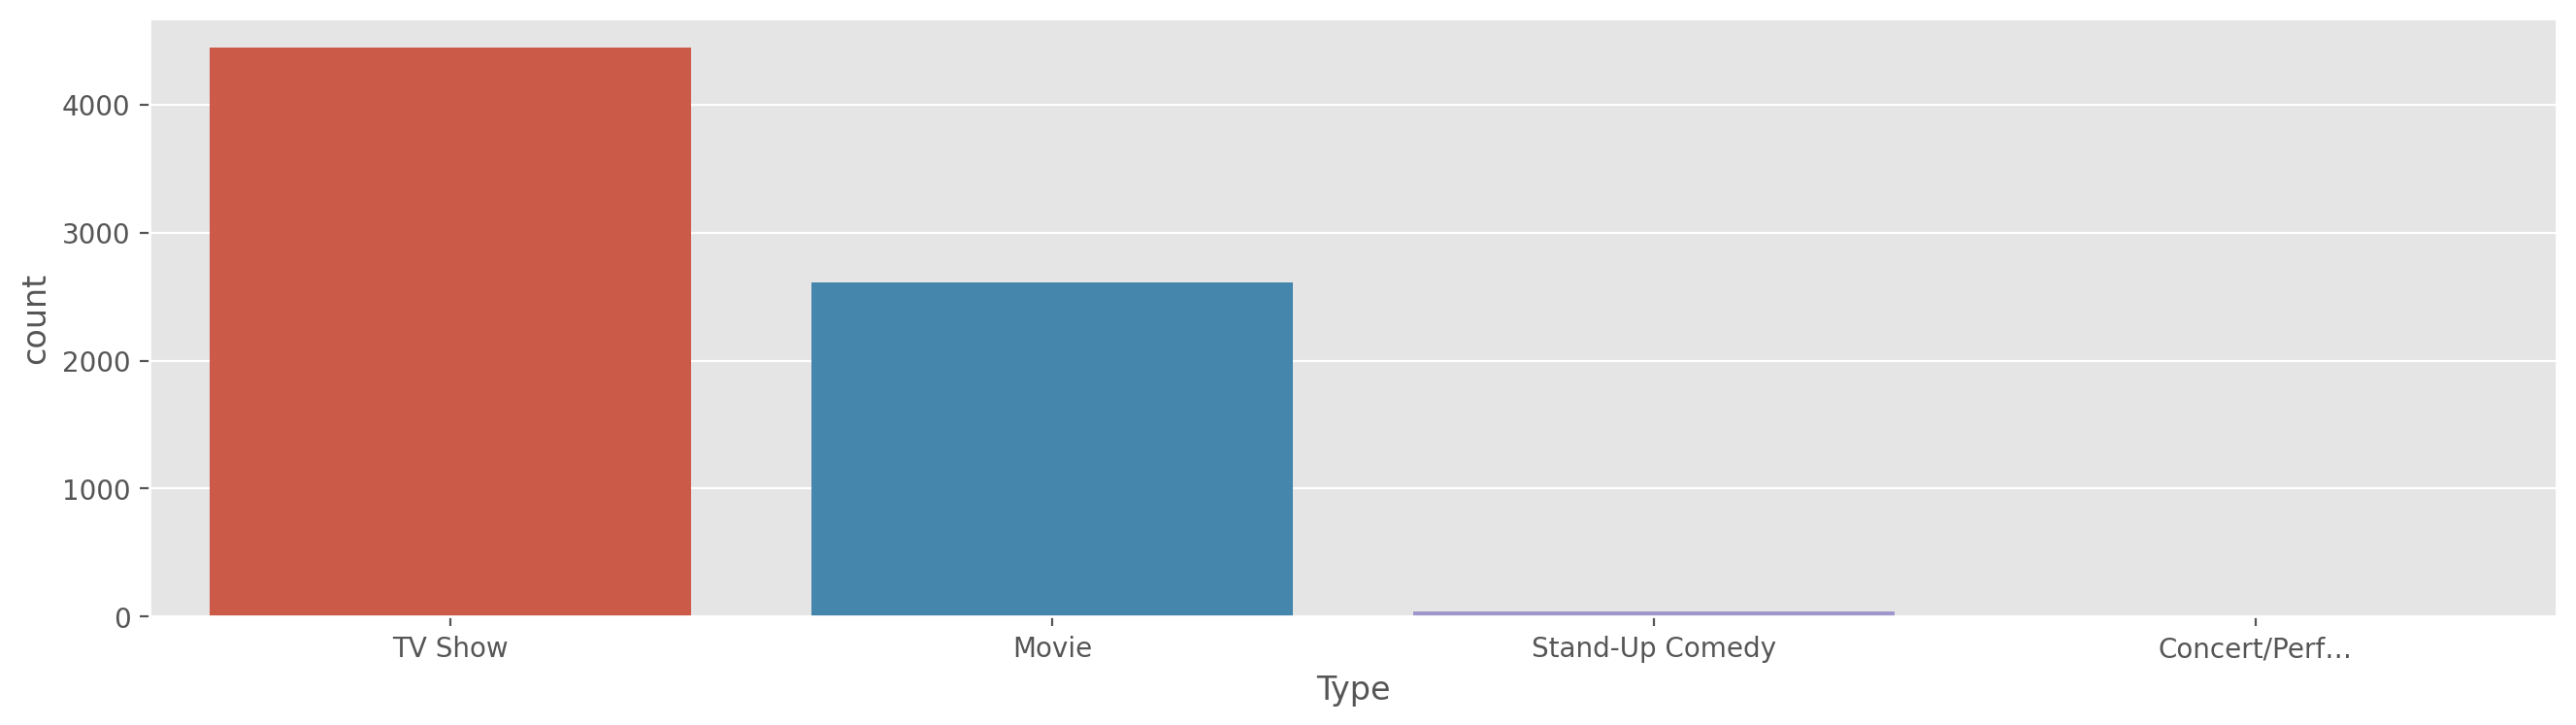

In [76]:
plt.figure(figsize = (16,4), dpi = 200)
sns.countplot('Type', data = data)
plt.show()

<AxesSubplot:xlabel='Type', ylabel='Viewership Score'>

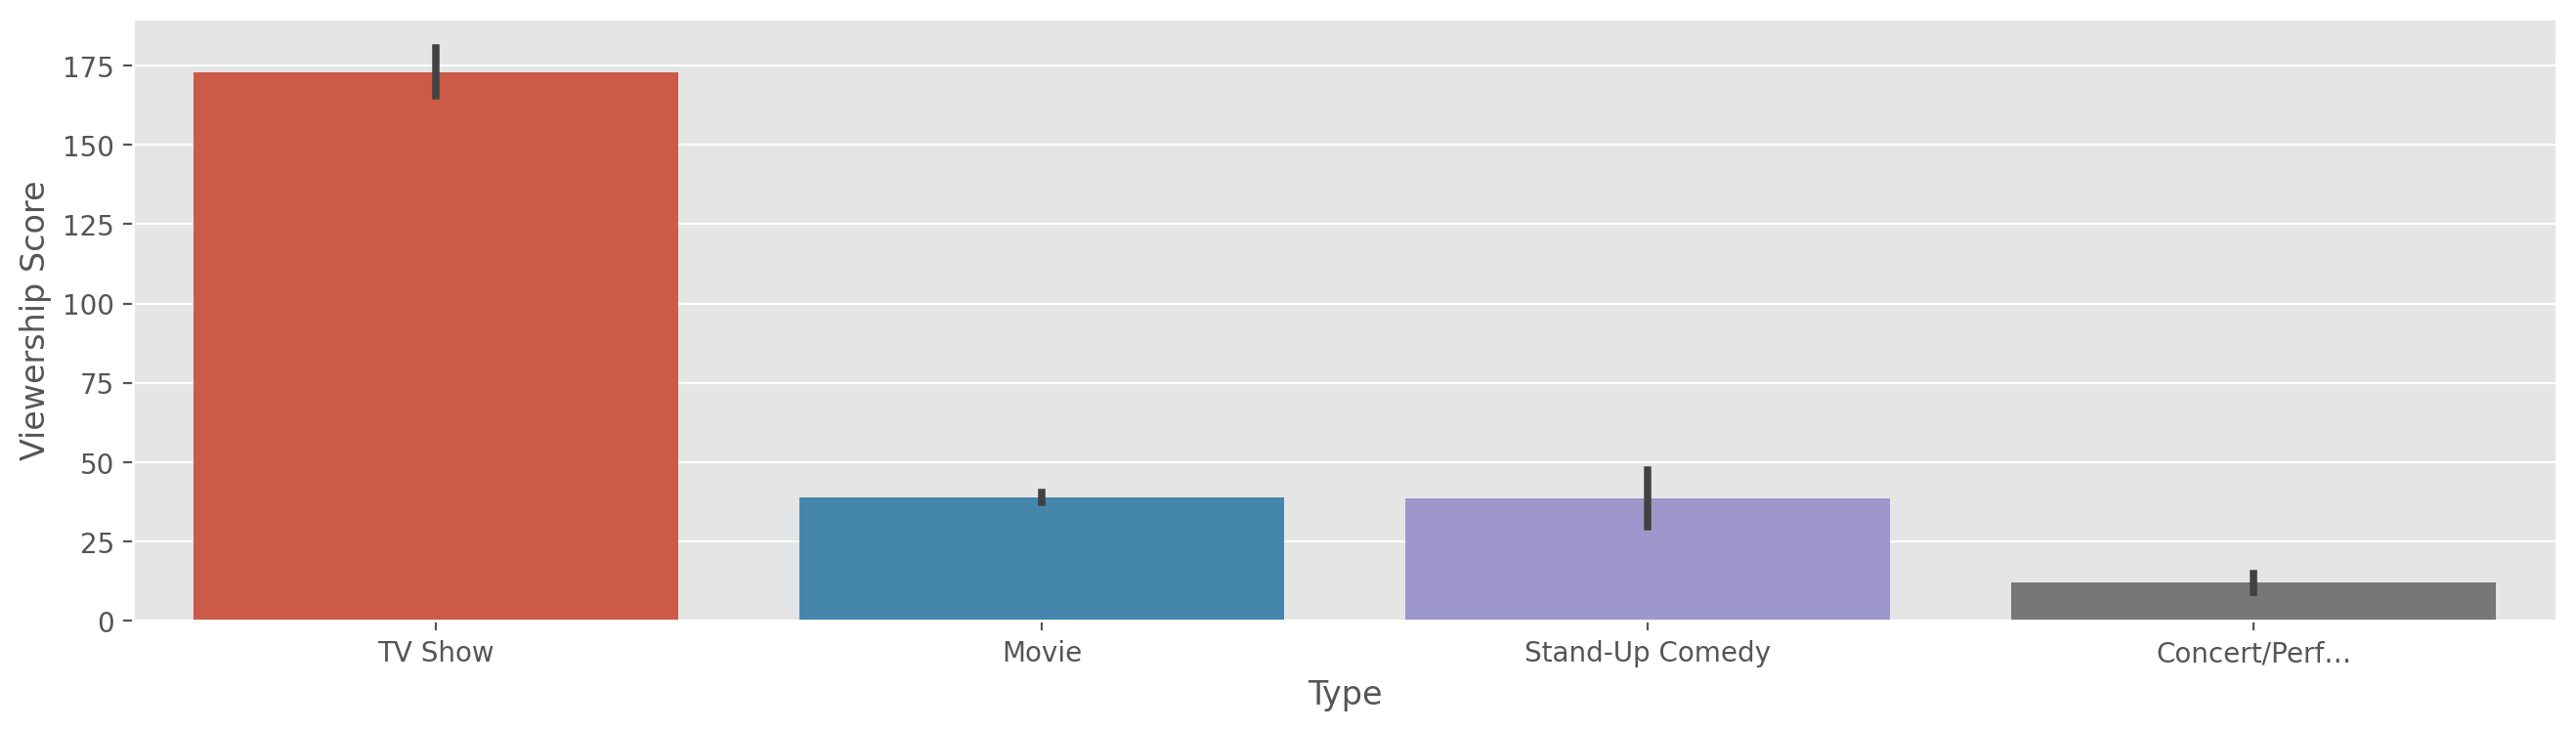

In [75]:
plt.figure(figsize = (16,4), dpi = 200)
sns.barplot('Type', 'Viewership Score', data = data)

#### TV shows is the highest type among all types having the highest viewership scores in comparison of all.

In [80]:
first_rank = data[data['Rank'] == 1][data['Days In Top 10'] >= 60]
first_rank.head(20)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
5040,2021-08-18,1,2,1,Outer Banks,TV Show,2020-04-15,61,472
5050,2021-08-19,1,1,1,Outer Banks,TV Show,2020-04-15,62,482
5060,2021-08-20,1,1,2,Outer Banks,TV Show,2020-04-15,63,492
6460,2022-01-07,1,1,0,Cobra Kai,TV Show,2020-08-28,60,440
6470,2022-01-08,1,1,1,Cobra Kai,TV Show,2020-08-28,61,450
6480,2022-01-09,1,1,1,Cobra Kai,TV Show,2020-08-28,62,460
6490,2022-01-10,1,1,1,Cobra Kai,TV Show,2020-08-28,63,470
6500,2022-01-11,1,1,1,Cobra Kai,TV Show,2020-08-28,64,480
6510,2022-01-12,1,1,1,Cobra Kai,TV Show,2020-08-28,65,490


<AxesSubplot:xlabel='Type', ylabel='count'>

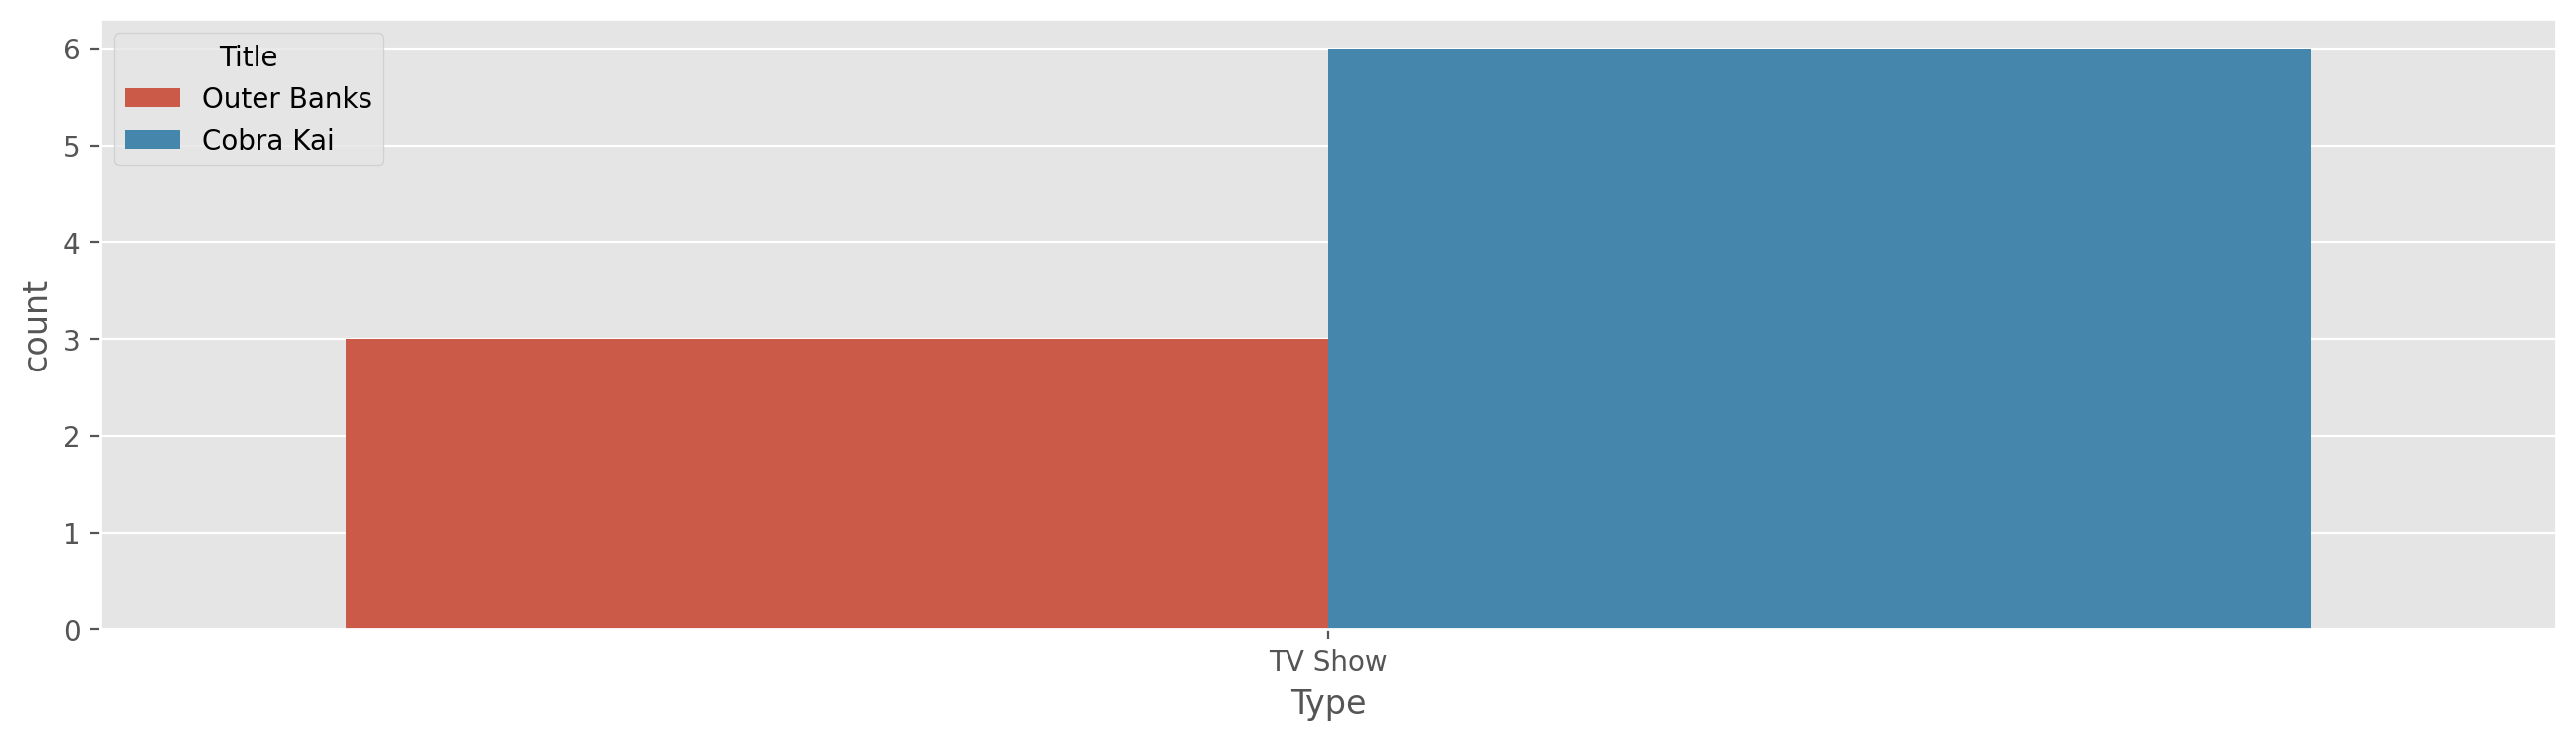

In [89]:
plt.figure(figsize = (16,4), dpi = 200)
sns.countplot('Type', hue = 'Title', data = first_rank)

#### TV shows (with titles Outer Banks and Cobra Kai) is the only type holding rank 1 and remaining in top 10 for more than 2 months.


In [91]:
highest_viewer_score = data[data['Viewership Score']>=1000]
highest_viewer_score

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
4916,2021-08-05,7,6,6,Cocomelon,TV Show,2020-06-01,281,1000
4927,2021-08-06,8,7,8,Cocomelon,TV Show,2020-06-01,282,1003
4938,2021-08-07,9,8,6,Cocomelon,TV Show,2020-06-01,283,1005
4949,2021-08-08,10,9,7,Cocomelon,TV Show,2020-06-01,284,1006
4959,2021-08-09,10,10,8,Cocomelon,TV Show,2020-06-01,285,1007
...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,0,Cocomelon,TV Show,2020-06-01,424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,2020-06-01,425,1469
6718,2022-02-01,9,0,7,Cocomelon,TV Show,2020-06-01,426,1471
6959,2022-02-25,10,0,0,Cocomelon,TV Show,2020-06-01,427,1472


<AxesSubplot:xlabel='Title', ylabel='count'>

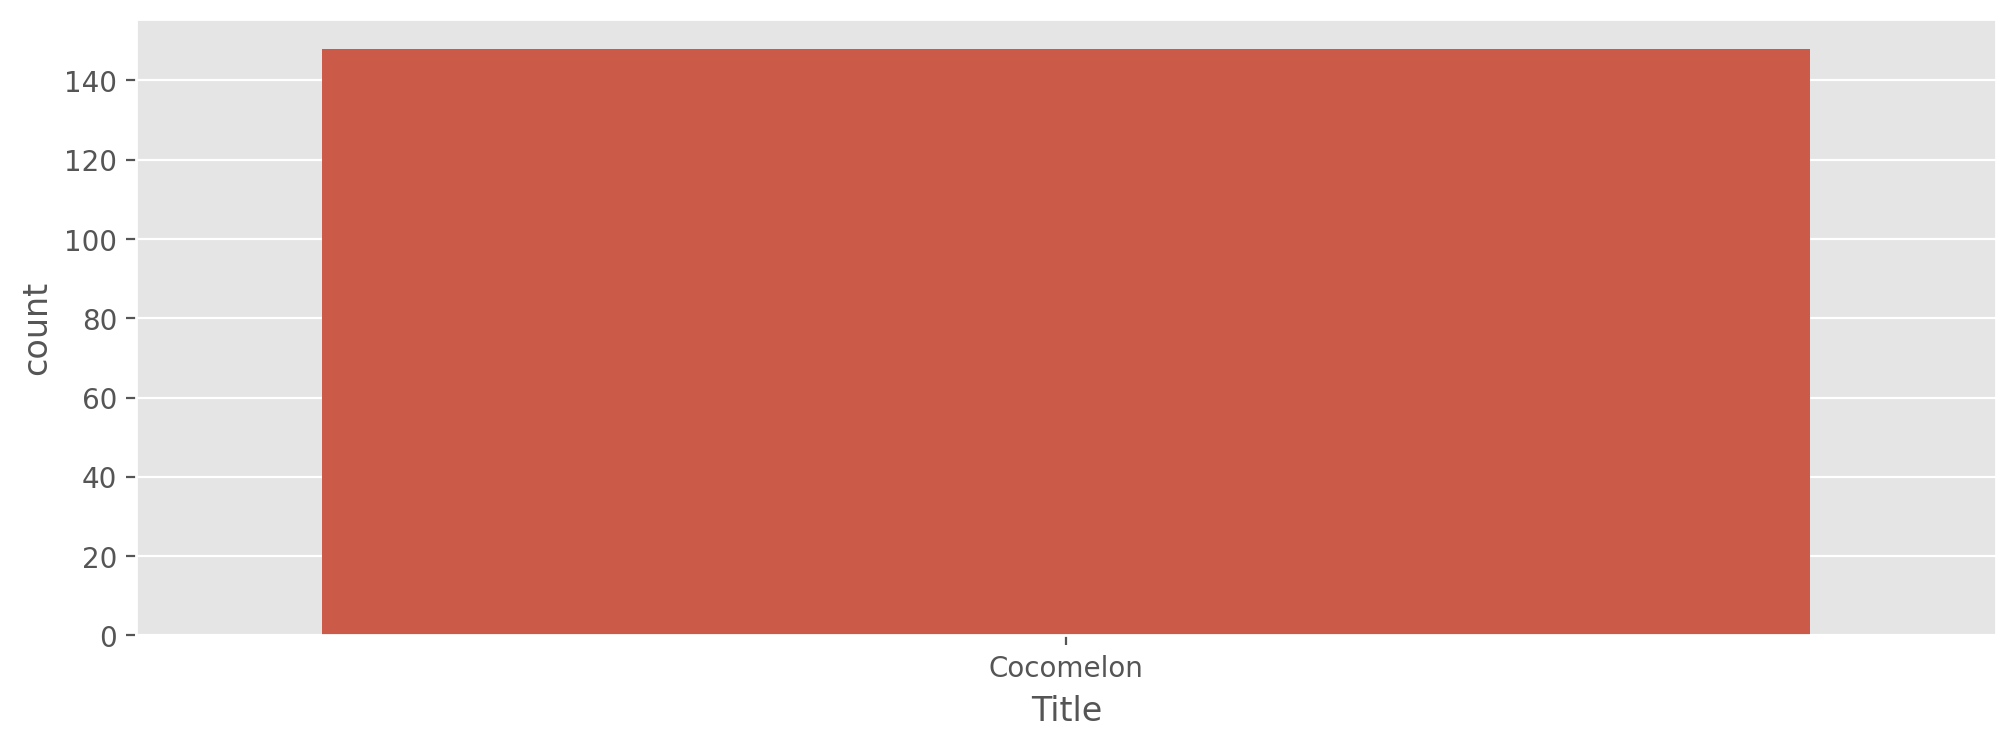

In [102]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot('Title', data = highest_viewer_score )

#### Cocomelon is the only title having viewscore greater than 1000 with average of above 1200

In [123]:
movies = data[data['Type'] == 'Movie'][data['Rank']==1][data['Viewership Score']>50]
movies

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
730,2020-06-13,1,2,0,365 Days,Movie,2020-07-07,6,53
760,2020-06-16,1,2,2,365 Days,Movie,2020-07-07,9,81
770,2020-06-17,1,1,2,365 Days,Movie,2020-07-07,10,91
780,2020-06-18,1,1,2,365 Days,Movie,2020-07-07,11,101
790,2020-06-19,1,1,2,365 Days,Movie,2020-07-07,12,111
1060,2020-07-16,1,1,0,The Old Guard,Movie,2020-07-10,6,60
1410,2020-08-20,1,1,0,Project Power,Movie,2020-08-14,6,60
1420,2020-08-21,1,1,0,Project Power,Movie,2020-08-14,7,70
1880,2020-10-06,1,1,0,American Murder: The Family…,Movie,2020-09-30,6,60
1890,2020-10-07,1,1,0,American Murder: The Family…,Movie,2020-09-30,7,70


<AxesSubplot:xlabel='Days In Top 10', ylabel='Title'>

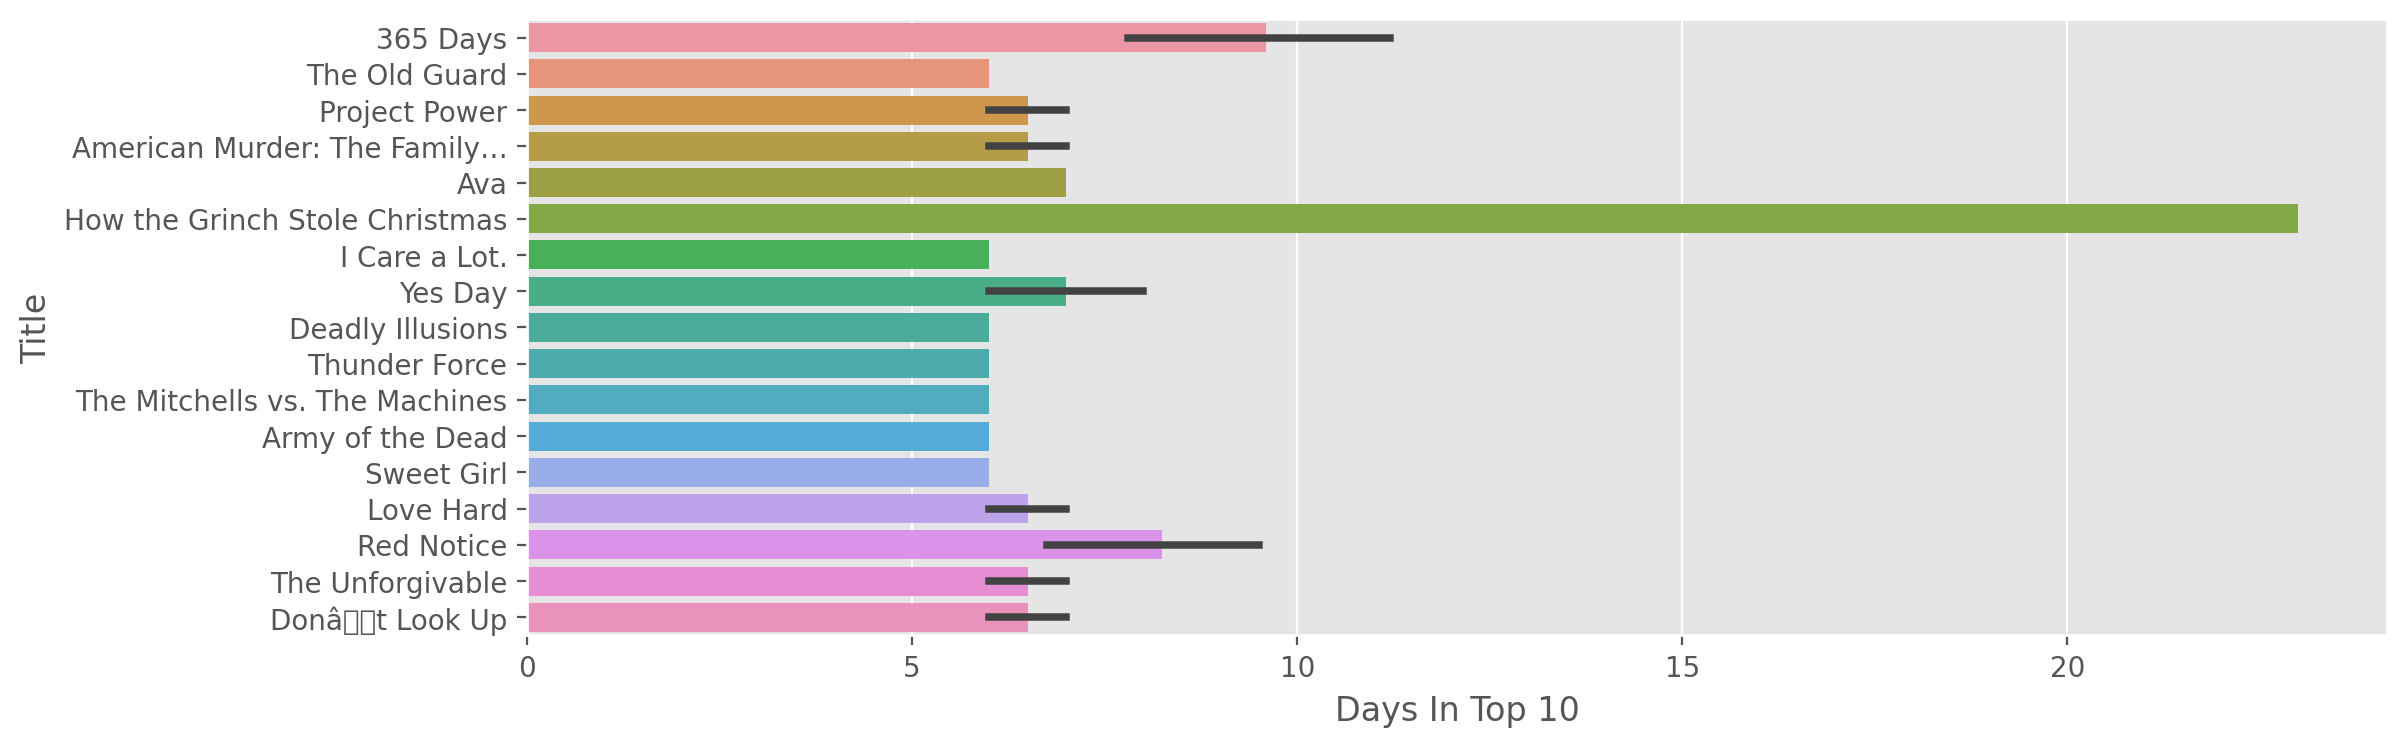

In [126]:
plt.figure(figsize = (12,4), dpi = 200)
sns.barplot('Days In Top 10', 'Title', data = movies)

#### The movie 'How the Grinch stole stole christmas' remained for higher no. of day in top 10 with rank 1.

# Summary

### Count of netflix release was negligible in year 2007 and 2013 and gradually increased till year 2019.
### A drastic increase in netflix release is noted in the year 2020 and 2021 where 2021 is the highest release holder.
### The content of movie type release was very low till year 2019 as compared to TV shows, but it took pace in year 2020 and overtook tv shows in year 2021 
### TV shows is the highest type among all types having the highest viewership scores in comparison of all.
### TV shows (with titles Outer Banks and Cobra Kai) is the only type holding rank 1 and remaining in top 10 for more than 2 months.
### Cocomelon is the only title having viewscore greater than 1000 with average of above 1200
### The movie 'How the Grinch stole stole christmas' remained for higher no. of day in top 10 with rank 1.